## Medical Health Insurance Cost Analysis and Prediction

Health insurance is a type of insurance that covers medical expenses that arise due to an illness. These expenses could be related to hospitalisation costs, cost of medicines or doctor consultation fees. The main purpose of medical insurance is to receive the best medical care without any strain on your finances. Health insurance plans offer protection against high medical costs. It covers hospitalization expenses, day care procedures, domiciliary expenses, and ambulance charges, besides many others. Based on certain input features such as age , bmi,,no of dependents ,smoker ,region  medical insurance is calculated .

-Columns:

- age: age of primary beneficiary
- sex: insurance contractor gender, female, male
- bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,       
-  objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9.
-  children: Number of children covered by health insurance / Number of dependents
-  smoker: Smoking
-  region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
-  charges: Individual medical costs billed by health insurance


In [201]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [202]:
# Loading dataset
med_df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset4/main/medical_cost_insurance.csv')
med_df.head(10)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


###### First 10 row of the dataset

In [203]:
med_df.tail(10)

,age,sex,bmi,children,smoker,region,charges
1328,23,female,24.225,2,no,northeast,22395.74424
1329,52,male,38.600,2,no,southwest,10325.20600
1330,57,female,25.740,2,no,southeast,12629.16560
1331,23,female,33.400,0,no,southwest,10795.93733
1332,52,female,44.700,3,no,southwest,11411.68500
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500
1337,61,female,29.070,0,yes,northwest,29141.36030


In [204]:
med_df.sample(n=10)

,age,sex,bmi,children,smoker,region,charges
592,20,male,31.130,2,no,southeast,2566.47070
1086,55,male,28.975,0,no,northeast,10796.35025
107,26,male,30.875,2,no,northwest,3877.30425
763,27,male,26.030,0,no,northeast,3070.80870
1153,35,female,35.815,1,no,northwest,5630.45785
233,59,male,27.500,1,no,southwest,12333.82800
371,57,female,22.230,0,no,northeast,12029.28670
821,26,male,17.670,0,no,northwest,2680.94930
156,48,male,24.420,0,yes,southeast,21223.67580
887,36,female,30.020,0,no,northwest,5272.17580


##### 10 random samples of the dataset

In [205]:
# size Rows and columns 
print('Number of rows:', med_df.shape[0])
print('Number of columns:', med_df.shape[1]) 

Number of rows: 1338
Number of columns: 7


###### The dataset set contains 1338 numbers of rows and 7 columns. 

In [206]:
# columns details 
med_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


 According to the colums result, there are no null values in the data, 7 columns have 3 different types of data and 1338 numbers of rows, including the memoery size.

In [207]:
# Numerical features statistics 
med_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


 According to the results, the count data  in all columns are same. The min values and  25 percentile are same values, some data looks categorical but data types appears to be int64

## Visualizing The Data 
### Distribution of charges

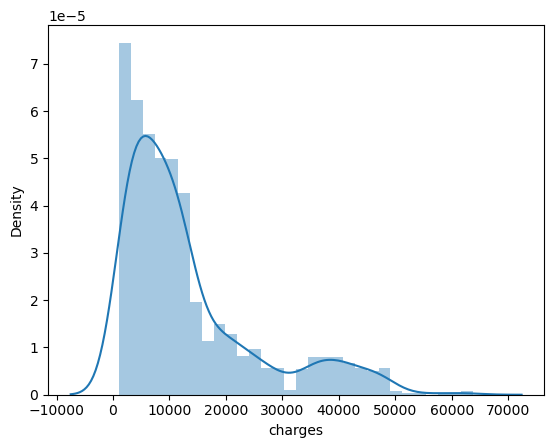

In [208]:
# Distribution of the charges

sns.distplot(med_df.charges, kde = True)
plt.show()





Note:  Charges distribution is skewed to the right

### Visualizing distribution of numerical variables vs  charges

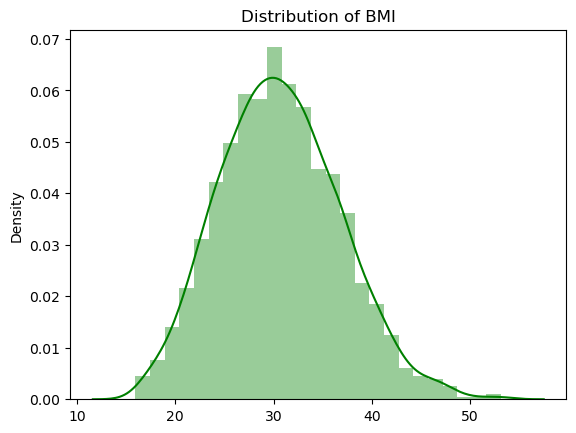

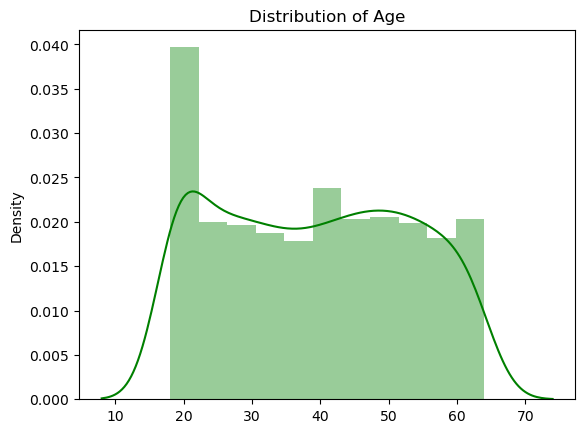

In [209]:
sns.distplot(x= med_df.bmi, color = 'g',  kde = True)
plt.title('Distribution of BMI')
plt.show()

sns.distplot(x= med_df.age, color = 'g', kde = True)
plt.title('Distribution of Age')
plt.show()


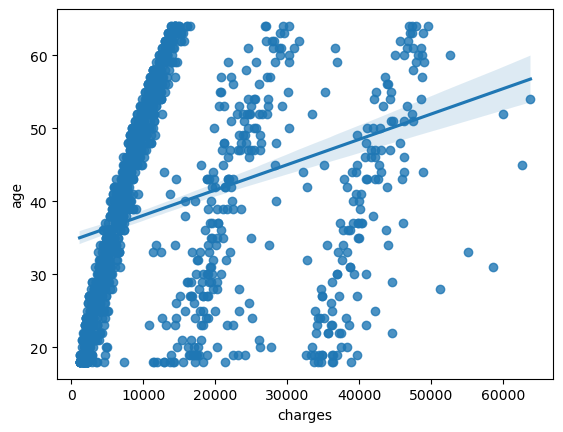

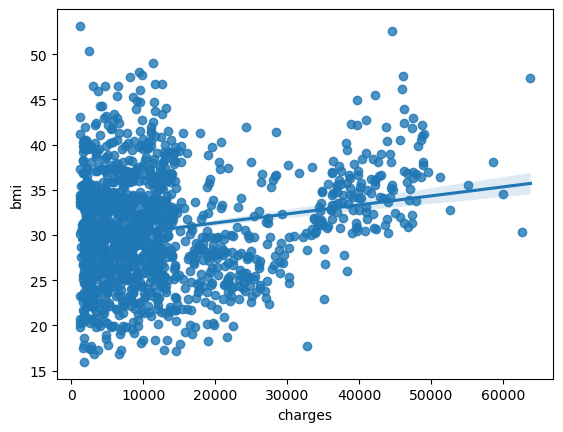

In [212]:
# Regplot for Age, Charges
sns.regplot(x = 'charges', y = 'age', data = med_df)
plt.show()

# Regplot for BMI, Charges
sns.regplot(x = 'charges', y = 'bmi', data = med_df)
plt.show()

The above Regplot graph show there is a linear relationship between the numerical variable  vs   charges 

### Visualizing categorical variables individually vs medical charges

<Figure size 1000x500 with 0 Axes>

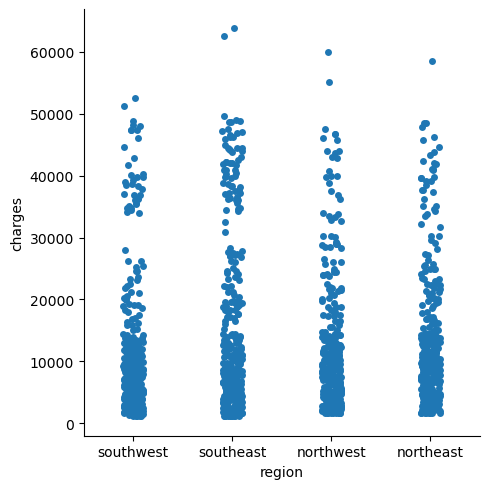

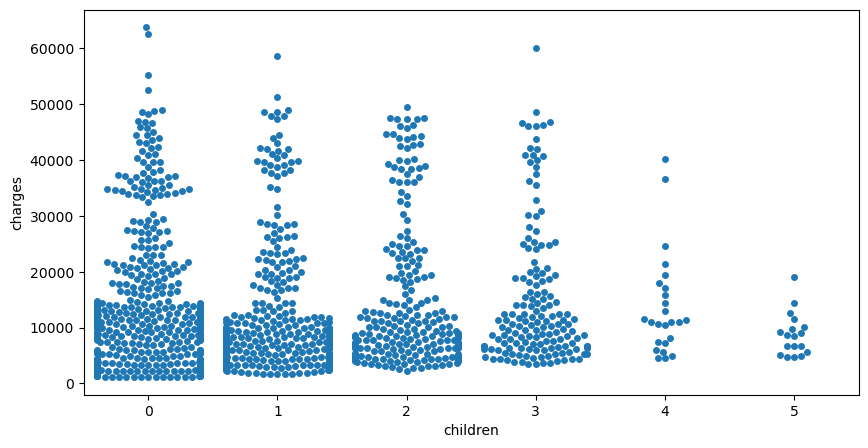

<Figure size 1000x500 with 0 Axes>

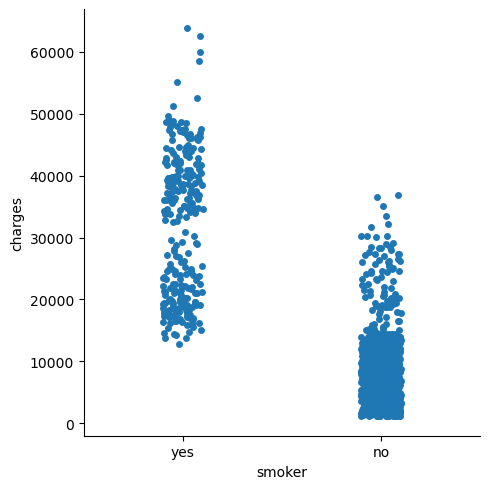

<Figure size 1000x500 with 0 Axes>

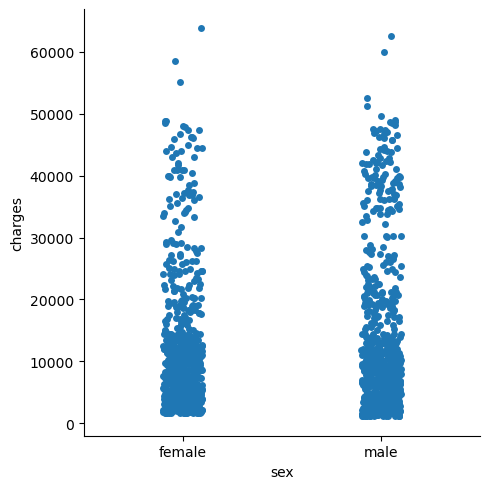

In [214]:
plt.figure (figsize = (10,5))
sns.catplot(x ='region', y = 'charges', data = med_df)
plt.show()

plt.figure (figsize = (10,5))
sns.swarmplot(x ='children', y = 'charges', data = med_df)
plt.show()

plt.figure (figsize = (10,5))
sns.catplot(x ='smoker', y = 'charges', data = med_df)
plt.show()

plt.figure (figsize = (10,5))
sns.catplot(x ='sex', y = 'charges', data = med_df)
plt.show()

 Based on the box plots above, we can derive some inferences on the categorical variables: 
- Region: Comparison between individual in  regions  , Southeast region has the highest medical charges, while southwest have the lowest. 
- Children: 2 children amongs others have the highest medical charges above 60000.
- Gender: The two individual paying the highest amount are  male and female. 
- Smokers: Smokers pays higher medical charges than non smokers

This is how each categorical features impact on medical charges, let's see how additional factors would impact on medical charges.

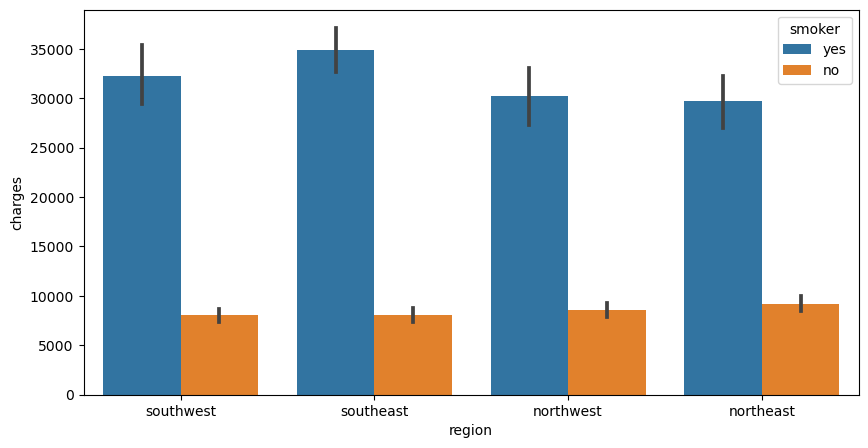

In [221]:
# region vs charges
plt.figure (figsize = (10,5))
sns.barplot(x ='region', y = 'charges', data = med_df, hue = 'smoker')
plt.show()

Region does not impact on your medical charges but those smoking in all the region have higher charges compare to non smokers. Again it is confirm that southeast has the highest medical charges.

##### Charges by age, bmi, and children, inrespect to their smoking status 

Text(0.5, 1.0, 'Number of children vs Charges')

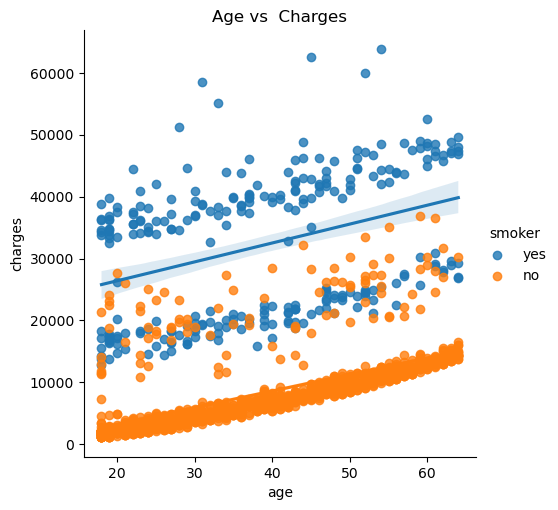

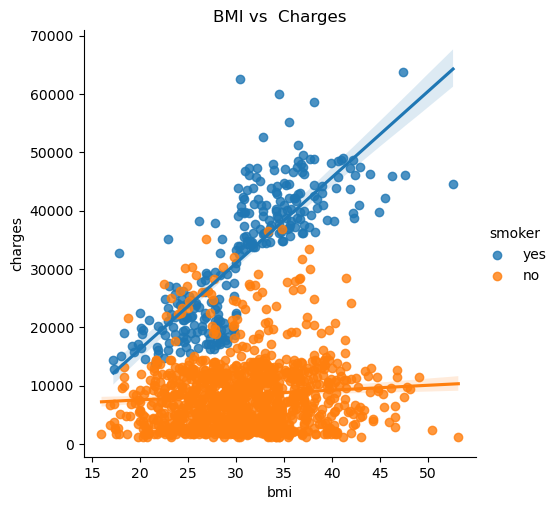

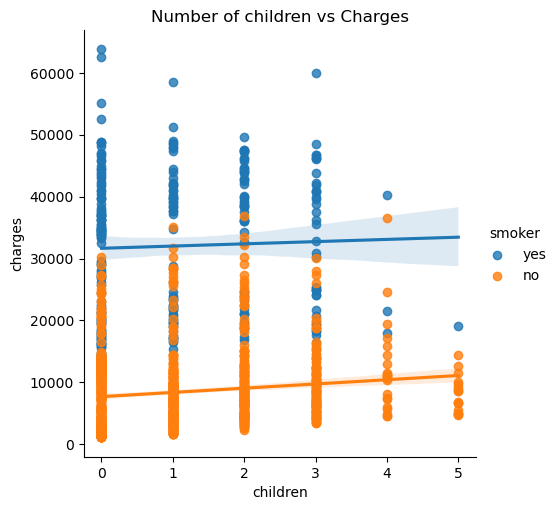

In [222]:
ax = sns.lmplot(x = 'age', y = 'charges', data = med_df, hue = 'smoker')
plt.title('Age vs  Charges')

ax = sns.lmplot(x = 'bmi', y = 'charges', data = med_df, hue = 'smoker')
plt.title('BMI vs  Charges')

ax = sns.lmplot(x = 'children', y = 'charges', data = med_df, hue = 'smoker')
plt.title('Number of children vs Charges')

In [223]:
med_df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

Inrespect to the above graph, smoking increases on medical costs. Also smoking with other factors conbination 


Looking look at the correlation between all the variable using heatmap. But before doing so lets trasform our object data into categorical variables.

In [330]:
med_df[['region','sex','smoker']] = med_df[['region','sex','smoker']].astype('category')
med_df.dtypes

age            int64
sex         category
bmi          float64
children       int64
smoker      category
region      category
charges      float64
dtype: object

In [224]:
# Transforming categorical Data to numerical type using LabelEncoder
from sklearn.preprocessing import LabelEncoder
label_enc = LabelEncoder()
df = label_enc.fit_transform(med_df['region'])
df = label_enc.fit_transform(med_df['sex'])
df = label_enc.fit_transform(med_df['smoker'])                                    
                                    

In [225]:
med_df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [226]:
# Transforming categorical Data to numerical type using LabelEncoder
from sklearn.preprocessing import LabelEncoder
label_enc = LabelEncoder()

label_enc.fit(med_df.region.drop_duplicates())
med_df.region = label_enc.transform(med_df.region)

label_enc.fit(med_df.sex.drop_duplicates())
med_df.sex = label_enc.transform(med_df.sex)

label_enc.fit(med_df.smoker.drop_duplicates())
med_df.smoker = label_enc.transform(med_df.smoker)

med_df.dtypes

age           int64
sex           int32
bmi         float64
children      int64
smoker        int32
region        int32
charges     float64
dtype: object

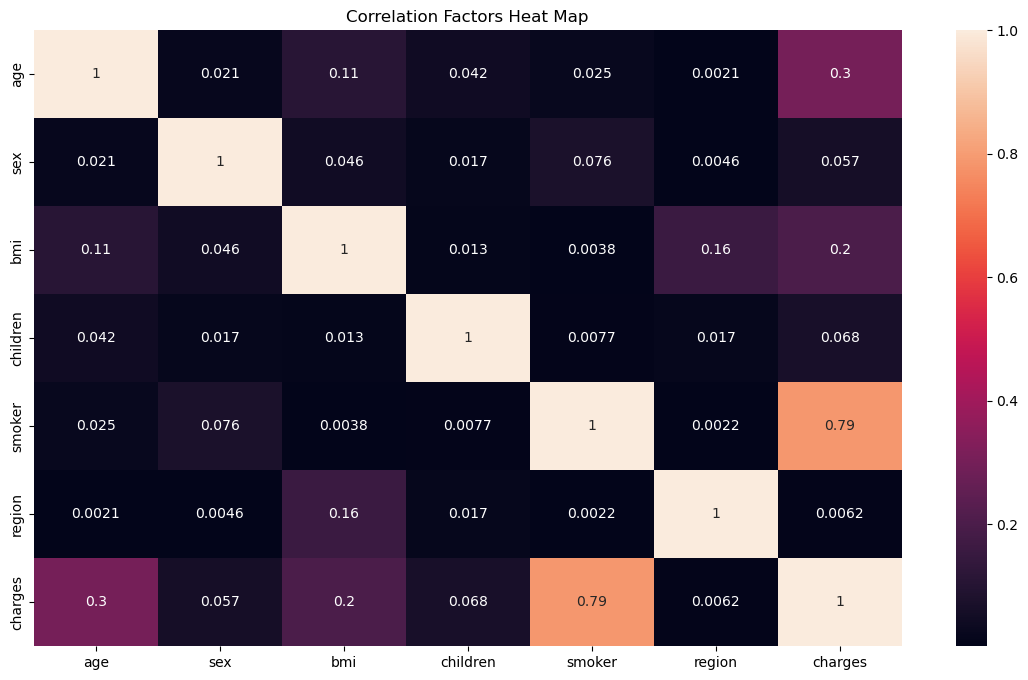

In [227]:
df_corr = med_df.corr().abs()
plt.figure(figsize = (14,8))
sns.heatmap(df_corr,annot = True,annot_kws={'size':10})
plt.title('Correlation Factors Heat Map')
plt.show()

- The heatmap shows the variables that have multicollinearity and variables that have high collinearity with the target varible (charges).
- Is appears that smoker is highly correlated with charges, fellowed by age and bmi

## Data for Machine Learning

Apply machine learning methods to predict future insurance cost of patients based on several factors.

However, lets  split our data into training and testing 

In [247]:
# importing necessary libraries 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

In [341]:
# Diving data set into features and label/target 
x = med_df.drop(['charges'], axis = 1)
y = med_df['charges']

Medical charges which is our targes variable has been dropped from our main data set and stored in y, while the main data set has been scored in x 

### Applying Standard Scaler

In [342]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled

array([[-1.43876426, -1.0105187 , -0.45332   , -0.90861367,  1.97058663,
         1.34390459],
       [-1.50996545,  0.98959079,  0.5096211 , -0.07876719, -0.5074631 ,
         0.43849455],
       [-0.79795355,  0.98959079,  0.38330685,  1.58092576, -0.5074631 ,
         0.43849455],
       ...,
       [-1.50996545, -1.0105187 ,  1.0148781 , -0.90861367, -0.5074631 ,
         0.43849455],
       [-1.29636188, -1.0105187 , -0.79781341, -0.90861367, -0.5074631 ,
         1.34390459],
       [ 1.55168573, -1.0105187 , -0.26138796, -0.90861367,  1.97058663,
        -0.46691549]])

The independent variables have been standardardized. 

##### Spliting data into Train and Test.

In [343]:
x_train, x_test, y_train, y_test=train_test_split(x_scaled,y,test_size =0.25,random_state=30)

The coeficient for sex and region variables are negative that means they are not adding to medical charges. 

### Machine Learning
The goal is to determine the insurance cost for an individual based on several factors. Therefore, this is a regression case. Regression models a target prediction value based on independent variables.
We will use the following algorithms - 
- Linear Regression
- Random Forest Regressor
- Support vector machine 
- GradientBosstingRegressor 

##  Model Training 

In [344]:
# Initializing model
lm = LinearRegression()
lm.fit(x_train,y_train)
svm = SVR()
svm.fit(x_train,y_train)
rdf = RandomForestRegressor()
rdf.fit(x_train,y_train)



RandomForestRegressor()

##### lets compare all our models  predictions with the medical charges giving the data in the zero row if is accurate 

In [345]:
med_df.head(2)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.90,0,1,3,16884.9240
1,18,1,33.77,1,0,2,1725.5523


In [347]:
print('medical charges predicted by lm:', lm.predict(scaler.transform([[19,0,27.90,0,1,3]])))
print('medical charges predicted by rdf:', rdf.predict(scaler.transform([[19,0,27.90,0,1,3]])))
print('medical charges predcited by svm:', svm.predict(scaler.transform([[19,0,27.90,0,1,3]])))



medical charges predicted by lm: [24906.77513817]
medical charges predicted by rdf: [17052.157276]
medical charges predcited by svm: [9258.78892585]


The Random forest model predicted  17052.i57276, almost with 16884.9240. 

In [348]:
# Model Training score 
print('LM Training score :', lm.score(x_train,y_train)*100)
print('RDF Training score:', rdf.score(x_train,y_train)*100)
print('SVM Training score:', svm.score(x_train,y_train)*100)


LM Training score : 74.64276566134849
RDF Training score: 97.67325620317479
SVM Training score: -9.754629295533835


The above result shows RandomForestRgressor has the highest training score of 97%

In [349]:
# Model test score 
print('LM Testing score :', lm.score(x_test,y_test)*100)
print('RDF Testing score:', rdf.score(x_test,y_test)*100)
print('SVM Testing score:', svm.score(x_test,y_test)*100)


LM Testing score : 76.18059615949161
RDF Testing score: 81.7336104398821
SVM Testing score: -13.29478255513974


The above result shows GradientBoostingRegressor has the highest testing score of 83.94%

### Predicting on X test Data 

In [351]:
lm_pred = lm.predict(x_test)
svm_pred = svm.predict(x_test)
rdf_pred = rdf.predict(x_test)


# Comparing our Y_test(Actual) to our Model prediction
df_pred = pd.DataFrame({'Actual':y_test,'Lr':lm_pred,
                        'svm':svm_pred,'rdf':rdf_pred})
df_pred

,Actual,Lr,svm,rdf
338,41919.09700,35657.567113,9303.718956,41546.976819
620,3659.34600,5646.176142,9155.034111,4341.684737
965,4746.34400,5571.772735,9168.502670,6258.711070
128,32734.18630,26520.534981,9271.694957,16667.294737
329,9144.56500,12738.600804,9242.821112,12660.939905
...,...,...,...,...
288,47896.79135,39674.031607,9298.617840,47654.279718
652,8280.62270,10358.795414,9223.593665,9522.987049
1235,2699.56835,4630.191524,9143.141788,3452.743470
921,13462.52000,14434.625412,9271.634824,13548.075171


### Lets compare both model prediction and Actual y_test(Actual) through visualizing using scatter plot

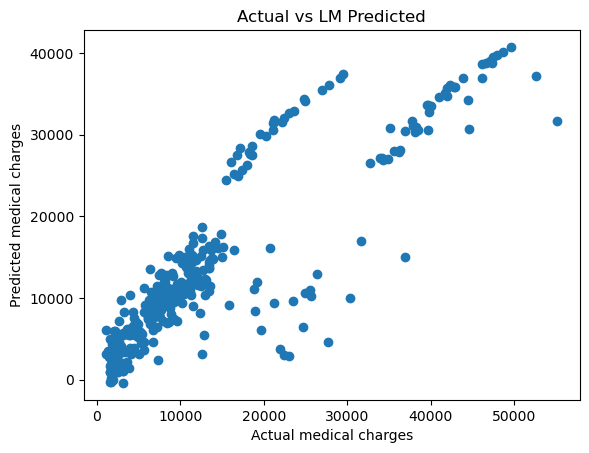

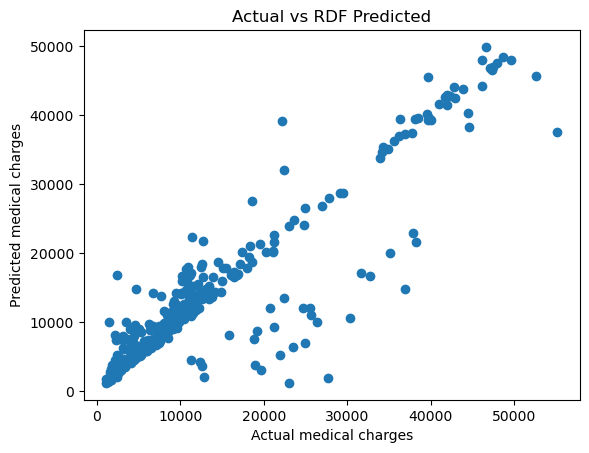

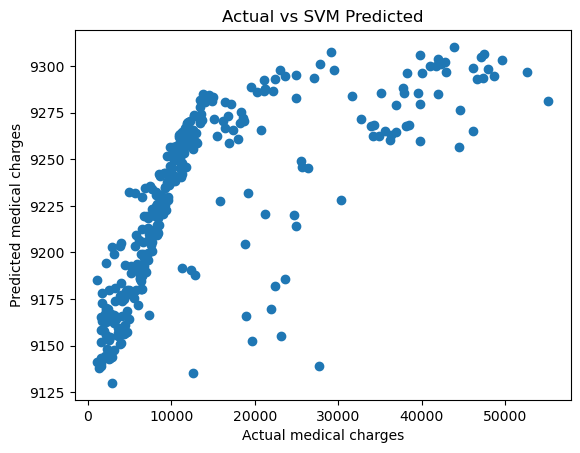

In [352]:
# for linearRegression Model
plt.scatter(y_test, lm_pred)
plt.xlabel('Actual medical charges')
plt.ylabel('Predicted medical charges')
plt.title('Actual vs LM Predicted')
plt.show()

# Random Forest regressor  
plt.scatter(y_test, rdf_pred)
plt.xlabel('Actual medical charges')
plt.ylabel('Predicted medical charges')
plt.title('Actual vs RDF Predicted')
plt.show()

# Support Vector Machine
plt.scatter(y_test, svm_pred)
plt.xlabel('Actual medical charges')
plt.ylabel('Predicted medical charges')
plt.title('Actual vs SVM Predicted')
plt.show()




In [308]:
# Importing Metrics
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [353]:
# Model confidence, R2 score which lies between 0-1
r2_lm = r2_score(y_test,lm_pred)
r2_rdf = r2_score(y_test,rdf_pred)
r2_svm= r2_score(y_test,svm_pred)
print('Confident of all models:', r2_lm,r2_rdf,r2_svm)

Confident of all models: 0.7618059615949162 0.817336104398821 -0.1329478255513974


RandomForest again has the best R2 score of 0.8174 which is almost same with the Random Forest tessting score 81.94

In [355]:
## Mean Absolute error 
mae_lm = mean_absolute_error(y_test,lm_pred)
mae_rdf = mean_absolute_error(y_test,rdf_pred)
mae_svm= mean_absolute_error(y_test,svm_pred)
print('Mean absolute error:', mae_lm, mae_rdf, mae_svm)



Mean absolute error: 4140.672811443465 2842.6337964579357 8339.30553866127


In [356]:
## Mean squared error 
mse_lm = mean_squared_error(y_test,lm_pred)
mse_rdf = mean_squared_error(y_test,rdf_pred)
mse_svm= mean_squared_error(y_test,svm_pred)
print('Mean squared error:', mse_lm, mse_rdf, mse_svm)

Mean squared error: 35754283.39982699 27418892.31977341 170061928.9349848


In [358]:
## Root Mean squared error 
rmse_lm = np.sqrt(mean_squared_error(y_test,lm_pred))
rmse_rdf = np.sqrt(mean_squared_error(y_test,rdf_pred))
rmse_svm=  np.sqrt(mean_squared_error(y_test,svm_pred))
print('Mean squared error:', rmse_lm, rmse_rdf, rmse_svm)

Mean squared error: 5979.488556710096 5236.305216445409 13040.77946040745


In [359]:
# lets see the intercept and coeficient of each features using the Linear regression trained model
print('Intercep: ----->', lm.intercept_)
print('age: ----->', lm.coef_[0])
print('sex: ---->', lm.coef_[1])
print('bmi:---->', lm.coef_[2])
print('children: ---->', lm.coef_[3])
print('smoker: ---->', lm.coef_[4])
print('region: ----->', lm.coef_[5])

Intercep: -----> 13235.414533271956
age: -----> 3710.439506952547
sex: ----> -94.9402857290901
bmi:----> 1978.1106217992044
children: ----> 529.6702883148994
smoker: ----> 9504.273055959045
region: -----> -325.27699333328087


sex and region independent variables are showing negative, that means they are not contributing to the medical charges and both variables we discarded out of feartures. 

In [360]:
# droping sex and region from our x (independents variables data )
new_features = x.drop(['sex','region'], axis = 1)
new_features 

,age,bmi,children,smoker
0,19,27.900,0,1
1,18,33.770,1,0
2,28,33.000,3,0
3,33,22.705,0,0
4,32,28.880,0,0
...,...,...,...,...
1333,50,30.970,3,0
1334,18,31.920,0,0
1335,18,36.850,0,0
1336,21,25.800,0,0


sex and region have been dropped from our features. Currently the size of our data set is 1338 rows and 4 columns. 

### Splitting new data set into Train and test 

In [361]:
x_train, x_test, y_train, y_test=train_test_split(new_features,y,test_size =0.25,random_state=30)


# GradientBoosting Regressor()

In [362]:
#### Training model again 
gdb = GradientBoostingRegressor()
gdb.fit(x_train,y_train)

GradientBoostingRegressor()

In [367]:
# Model Training score 
print('LM Training score :', gdb.score(x_train,y_train)*100)
print('GDB Testing score: ', gdb.score(x_test, y_test)*100)

LM Training score : 90.76973080482045
GDB Testing score:  83.52228778466426


It looks like GradientBoosting model is the best model after discarding two features which are not adding value to the medical insurance charges and it will be use to predict the medical insurance charges for each person. For clarifcation below are the models accuracy scores. 
- Linear Regression: 76%
- Random Forest Regressor: 81%
- SVM : -13%
- Gradinet Boosting Regressor: 83%

In [369]:
# fearture variables
new_features.head()

,age,bmi,children,smoker
0,19,27.900,0,1
1,18,33.770,1,0
2,28,33.000,3,0
3,33,22.705,0,0
4,32,28.880,0,0


In [368]:
# Label variable 
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [370]:

gdb_pred = gdb.predict(x_test)


# Comparing our Y_test(Actual) to our Model prediction
final_pred  = pd.DataFrame({'Actual charges ':y_test, 'Predicted charges':gdb_pred})
final_pred

,Actual charges,Predicted charges
338,41919.09700,42650.400981
620,3659.34600,5669.647007
965,4746.34400,7159.600385
128,32734.18630,15686.705685
329,9144.56500,15551.354705
...,...,...
288,47896.79135,49430.819656
652,8280.62270,9891.496013
1235,2699.56835,4488.362318
921,13462.52000,14620.125119
